# Nyquist vs. Bode, epic rap battles of history

We've seen both Bode plots and the Nyquist plot now. However, just a recap: Bode plots have $s=j\omega$ on the horizontal axes and on the two vertical axes is the magnitude and phase of the transfer function. We've also been looking at magnitude and phase with Nyquist so we must be able to relate the two! Lets look at a dummy loop transfer function
$$L(s) = 150\cdot \frac{s(s-10)}{(s + 0.1)(s+50)^2}.$$
(Determine the poles and zeros for yourself)



In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import MultipleLocator
from matplotlib.gridspec import GridSpec
import matplotlib.animation as animation
from IPython.display import display

import warnings
warnings.filterwarnings("ignore")

from helperFunctions import *
setPlotStyle()


<IPython.core.display.Javascript object>

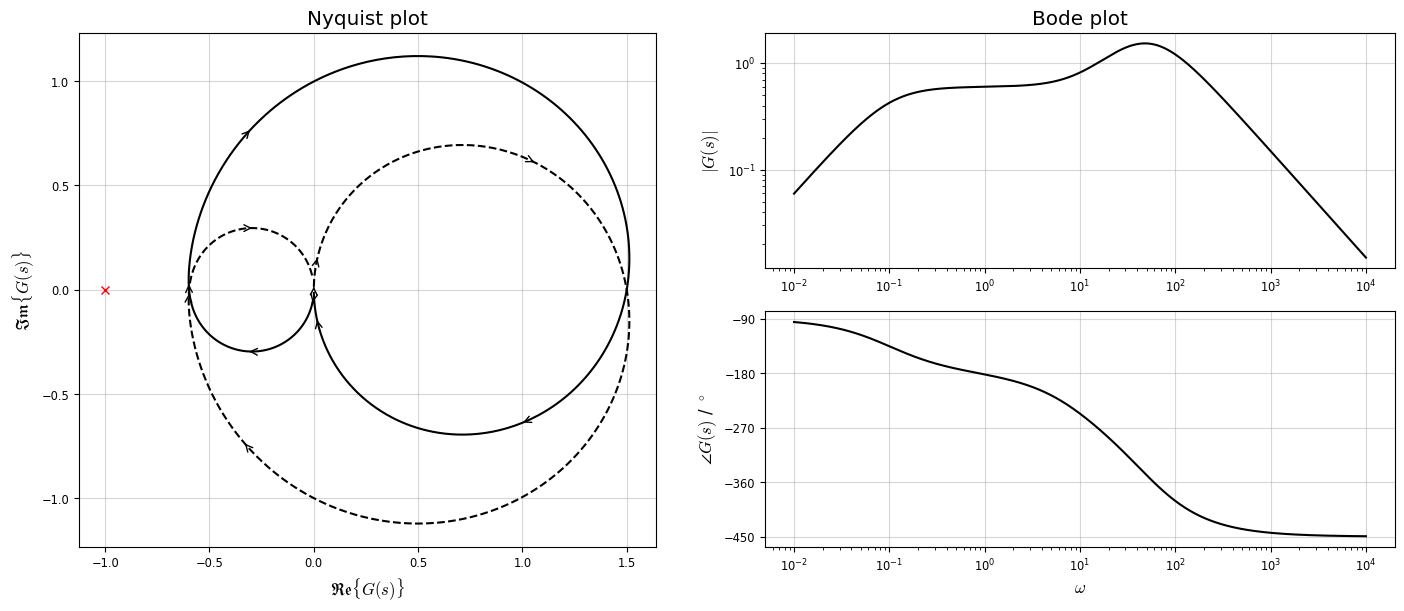

In [2]:
OM = np.logspace(-2, 4, 900)
S = OM*1j

L1 = lambda s :  150* s*(s - 1e1) / ((s + .1) * (s + 50)**2)
L1_eval1 = L1(S)
L1_eval2 = L1(np.flip(-S))

fig = plt.figure(num="Bode - Nyquist relation")
gs = GridSpec(2,2, figure=fig)
ax = [fig.add_subplot(a) for a in [gs[:, 0], gs[0, 1], gs[1, 1]]]

ax[0].set(title="Nyquist plot", 
          xlabel="$\mathfrak{Re}\{G(s)\}$", ylabel="$\mathfrak{Im}\{G(s)\}$")
ax[1].set(title="Bode plot", ylabel = "$|G(s)|$")
ax[2].set(xlabel = r"$\omega$", ylabel = r"$\angle G(s)$ / ${}^\circ$")
ax[2].yaxis.set_major_locator(MultipleLocator(90))

drawContour(ax[0], L1_eval1, c='k', ls='-')
drawContour(ax[0], L1_eval2, c='k', ls='--')
ax[0].plot([-1], [0], 'xr')
ax[1].loglog(OM, np.abs(L1_eval1), 'k')
ax[2].semilogx(OM, unwrap_angle(np.angle(L1_eval1, deg=True)), 'k')
display(fig)


Now **this**, this is something we can animate🌈

In [3]:
# OM = np.logspace(-2, 5, 50)
# S = OM*1j

L1_eval1 = L1(S)
L1_eval2 = L1(np.flip(-S))

L1_eval = np.append(L1_eval1, L1_eval2)
OM_full = np.append(OM, np.flip(-OM))

ang1, ang2, ang = unwrap_angle(np.angle(L1_eval1, deg=True)), unwrap_angle(np.angle(L1_eval2, deg=True)), unwrap_angle(np.angle(L1_eval, deg=True))

ax[2].cla()
ax[2].set(xlabel = r"$\omega$", ylabel = r"$\angle G(s)$ / ${}^\circ$")
ax[2].semilogx(np.abs(OM_full)[:OM_full.size//2], ang[:OM_full.size//2], 'k')
ax[2].semilogx(np.abs(OM_full)[OM_full.size//2:], ang[OM_full.size//2:], 'k--')

arr = ax[0].annotate("", xy=(L1_eval[0].real, L1_eval[0].imag), 
                    xytext=(0, 0),
                    arrowprops=dict(arrowstyle="-|>", color='red'))
magL, = ax[1].plot([OM_full[0], OM_full[0]],
                  [np.abs(L1_eval).min(), np.abs(L1_eval[0])],
                  'rx-')
angL, = ax[2].plot([OM_full[0], OM_full[0]],
                  [0, ang1[0]],
                  'rx-')

ss = np.arange(0, OM_full.size, step= OM_full.size//50, dtype=int)
def animate(t):
    t = ss[t]
    arr.xy = (L1_eval[t].real, L1_eval[t].imag)
    magL.set_data([abs(OM_full[t]), abs(OM_full[t])],
                  [np.abs(L1_eval).min(), np.abs(L1_eval[t])])
    angL.set_data([abs(OM_full[t]), abs(OM_full[t])],
                  [0, ang[t]])
    return arr, magL, angL

anim = animation.FuncAnimation(fig, func=animate, frames=50, interval=150, blit=True)

display(anim)


 Note the relation between the two plots!